<a href="https://colab.research.google.com/github/nived02/MultiOmics/blob/main/DH607_Assignment02_Problem01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DH607 - Assignment 02 - Problem 01
This notebook provides you a template to solve Problem 01 of your Assignment 02. While starter code is provided, you are expected to fill in the details across different code blocks indicated by "INSERT YOUR CODE HERE" --> these could be multiple lines of code.

Please be patient if you are coding (something like this) for the first time. You are allowed to discuss with your classmates, friends, or the instructor (See course website for office hours). The bonus problems towards the end are also fun and easily attemptable. Use the examples in your class to test your code. If they give you the desired alignment, you should more or less be okay with the final submission.



**In your final submission include a link to this notebook. Please ensure you make your notebooks available for viewing before sharing the link. To evaulate, we will run your notebooks so please ensure that "Runtime -> Restart session and run all" when invoked on your notebook runs without errors **.

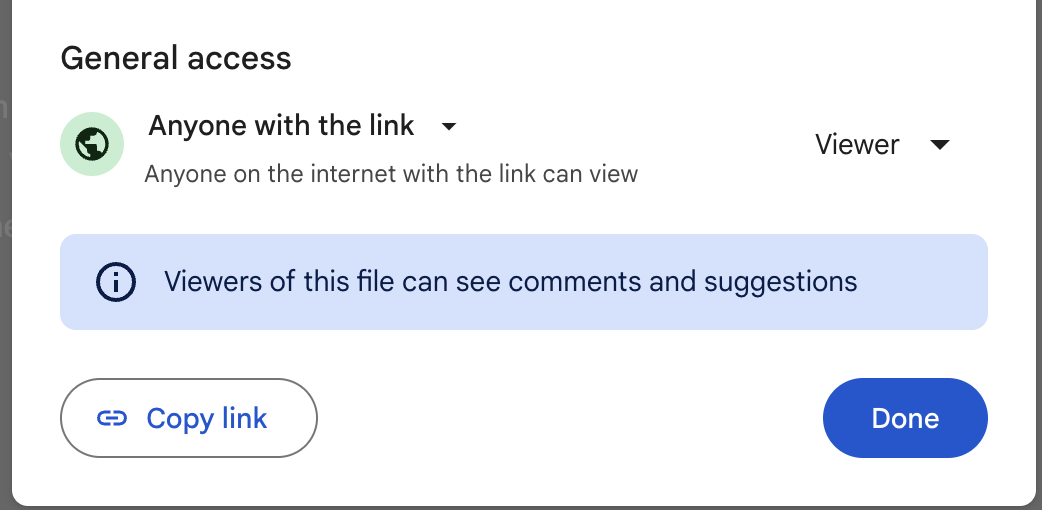



# Problem 01 - Global alignment


## Needleman-Wunsch scoring

Needleman-Wunsch algorithm is a dynamic programming solution to solving the global alignment problem. For two sequences $x,y$, it calculates the score of alignment at $i,j$ sequence as:

$$
\begin{align*}
S_{i,j} = max\begin{cases}
      S_{i-1,j-1} + s(x_i,y_j) & (1) \\
      S_{i-1,j}  + s(a_i, -) & (2) \\
      S_{i,j-1} + s(-,b_j) & (3)
   \end{cases}
\end{align*}
$$

Your goal for this assignment is to implement the Needleman Wunsch algorithm.






###Traceback Matrix

At each step when we make a choice for the highest score, we also need to keep a track of which cell gave the highest score. We can keep track of this in a separate $traceback\_matrix$. You can store this information in the following way, if $S_{i,j}=S_{i-1,j-1}+s(x_i, y_j)$, you would store $traceback\_matrix[i,j] = `go\_diagonal'$. Similarly for $S_{i,j} = S_{i-1,j} + s(a_i,-)$, the direction would be $traceback\_matrix[i,j] = `go\_left'$ and finally for $S_{i,j} = S_{i,j-1}+s(-, b_j)$ it will be $traceback\_matrix[i,j] = `go\_up'$. If there are even scores, we can just record one of them for the problem.

Once the score matrix and traceback matrix are complete, we track how the alignment should be printed out. We begin at the bottom right and using the directions we stored, we traceback the actual alignment. At each cell there are only three possible moves: 'go up', 'go left' or 'go diagonal'. Once we arrive at the top left (0,0) column, the alignment is complete.

In summary, the Needleman-Wunsch algorithm consists of three steps:

1. Score matrix intilization
2. Filling in the score matrix and traceback matrix
3. Print the final alignment using the traceback matrix

Your goal is to implement all these steps below.

# Problem 1a) [5 points]

Implement the scoring funciton for two nucleotides returning $s(a_i,b_j)$. You will use this function to calculate the score given one nucelotide from each of the two sequences. Given two nucelotides (A/C/T/G)  and match score (integer) and mismatch score (integer), this function will return the score of gap/match/mismatch. Full points for getting the initialization completely correct, 0 otherwise.


In [ ]:
def score_match_mismatch(row_nucleotide, col_nucleotide, match_score, mismatch_score):
  """Function to calculate score between two single nucleotides

  Parameters
  ----------
  row_nucleotide: character
                  One single nucelotide from the first sequence
  col_nuclotide: character
                  One single nucelotide from the second sequence
  match_score: int
               Score for when row and column bases match
  mismatch_score: int
                  Score for when row and column bases mismatch

  Returns
  -------
  score: int
         Match/mismatch/indel score
  """

 # Check if the nucleotides match
  if row_nucleotide == col_nucleotide:
    return match_score
  else:
    return mismatch_score


# DO NOT DELETE THIS
print(score_match_mismatch('A', 'C', 1,-1))

-1


# Problem 1b) [5 points]

Implement the intialization strategy for Needleman-Wunsch of the matrix $S(i,j)$ Your function should take 3 inputs: length of the two sequences and the gap score and generate the initial values for the alignment score matrix. Full points for getting the initialization completely correct, 0 otherwise.

In [ ]:
def initialize_score_matrix_nw(row_seq_length, col_seq_length, gap_score):
  """Function to initialize scoring matrix

  Parameters
  -----------
  row_seq_length: int
                 Length of the sequence that you stack along the rows
  col_seq_length: int
                 Length of the sequence that you stack along the columns
  gap_score: int
             Score (penalty) for a gap (indel)
  Returns
  --------
  s: list of list
     Scoring matrix
  """
  s = [[0 for j in range(1+col_seq_length)] for i in range(1+row_seq_length)]

    # Fill the first row and first column with gap penalties
  for i in range(1, row_seq_length + 1):
    s[i][0] = i * gap_score

  for j in range(1, col_seq_length + 1):
    s[0][j] = j * gap_score

  return s

# DO NOT DELETE THIS
print(initialize_score_matrix_nw(3, 3, -1))

[[0, -1, -2, -3], [-1, 0, 0, 0], [-2, 0, 0, 0], [-3, 0, 0, 0]]


# Problem 1c) [10 points]

Implement the needleman wunsch algorithm. Your function should take 5 inputs: the two sequences,  scoring function (from problem 1a),  gap score and match and mismatch scores. It should produce two outputs: traceback matrix and scoring matrix.

Full points only if the both the traceback matrix and scoring matrix are correct. 15 points for either of them being (fullly) correct, 0 otherwise.


In [ ]:
def run_needleman_wunsch(row_seq, col_seq, score_function, gap_score, match_score, mismatch_score):
    """Function to perform needleman wunsch algorithm

    Parameters
    -----------
    row_seq: str
             Sequence that you stack along the rows
    col_seq: str
             Sequence that you stack along the columns
    score_function: function
                    Function to calculate match/mismatch/gap scores given two nucleotides
    gap_score: int
               Score (penalty) for a gap (indel)
    match_score: int
                 Score for when row and column bases match
    mismatch_score: int
                    Score for when row and column bases mismatch

    Returns
    -------
    traceback_matrix: list of list
                      A matrix to traceback the highest score calculations

    s: list of list
       Score matrix
    """

    # Initialize lengths of sequences
    row_seq_length = len(row_seq)
    col_seq_length = len(col_seq)

    # Initialize scoring matrix (S) and traceback matrix
    s = [[0 for j in range(col_seq_length + 1)] for i in range(row_seq_length + 1)]
    traceback_matrix = [['' for j in range(col_seq_length + 1)] for i in range(row_seq_length + 1)]

    # Initialize first row and first column with gap penalties
    for i in range(1, row_seq_length + 1):
        s[i][0] = s[i-1][0] + gap_score
        traceback_matrix[i][0] = '↑'

    for j in range(1, col_seq_length + 1):
        s[0][j] = s[0][j-1] + gap_score
        traceback_matrix[0][j] = '←'

    # Fill the scoring and traceback matrices
    for i in range(1, row_seq_length + 1):
        for j in range(1, col_seq_length + 1):
            col_base = col_seq[j-1]
            row_base = row_seq[i-1]

            match_mismatch_score = s[i-1][j-1] + score_function(row_base, col_base, match_score, mismatch_score)
            delete_score = s[i-1][j] + gap_score
            insert_score = s[i][j-1] + gap_score

            max_score = max(match_mismatch_score, delete_score, insert_score)
            s[i][j] = max_score

            if max_score == match_mismatch_score:
                traceback_matrix[i][j] = '↖'
            elif max_score == delete_score:
                traceback_matrix[i][j] = '↑'
            else:
                traceback_matrix[i][j] = '←'

    return traceback_matrix, s

# Example to test the function
def score_match_mismatch(row_nucleotide, col_nucleotide, match_score, mismatch_score):
    return match_score if row_nucleotide == col_nucleotide else mismatch_score


# DO NOT DELETE THIS
print(run_needleman_wunsch(row_seq='AA', col_seq='AT', score_function=score_match_mismatch,
                           gap_score=-2, match_score=2, mismatch_score=-1))


([['', '←', '←'], ['↑', '↖', '←'], ['↑', '↖', '↖']], [[0, -2, -4], [-2, 2, 0], [-4, 0, 1]])


# Problem 1d) [10 points]

Use the tracebackmatrix and the two sequences to obtain the formatted versions of both the strings.
Full points for the correct implementation of the printing strategy, 0 otherwise.

For example, given a correct transition matrix, and `row_seq=WHY` and `col_seq=WHAT`, this funciton should return `WHAT, WH-Y` which can then be printed.



In [ ]:
def score_match_mismatch(row_nucleotide, col_nucleotide, match_score, mismatch_score):
    return match_score if row_nucleotide == col_nucleotide else mismatch_score

traceback_matrix, s = run_needleman_wunsch(row_seq='WHY', col_seq='WHAT',
                                           score_function=score_match_mismatch,
                                           gap_score=-2, match_score=2, mismatch_score=-1)

print("Scoring Matrix:")
for row in s:
    print(row)

print("Traceback Matrix:")
for row in traceback_matrix:
    print(row)

Scoring Matrix:
[0, -2, -4, -6, -8]
[-2, 2, 0, -2, -4]
[-4, 0, 4, 2, 0]
[-6, -2, 2, 3, 1]
Traceback Matrix:
['', '←', '←', '←', '←']
['↑', '↖', '←', '←', '←']
['↑', '↑', '↖', '←', '←']
['↑', '↑', '↑', '↖', '↖']


In [ ]:
def get_aligned_seqs(traceback_matrix, row_seq, col_seq):
    """Get the aligned sequences"""

    i = len(row_seq)
    j = len(col_seq)
    col_seq_aligned = ''
    row_seq_aligned = ''

    while i > 0 or j > 0:
        if traceback_matrix[i][j] == '↖':  # Diagonal, match/mismatch
            row_seq_aligned = row_seq[i-1] + row_seq_aligned
            col_seq_aligned = col_seq[j-1] + col_seq_aligned
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == '↑':  # Up, gap in col_seq
            row_seq_aligned = row_seq[i-1] + row_seq_aligned
            col_seq_aligned = '-' + col_seq_aligned
            i -= 1
        elif traceback_matrix[i][j] == '←':  # Left, gap in row_seq
            row_seq_aligned = '-' + row_seq_aligned
            col_seq_aligned = col_seq[j-1] + col_seq_aligned
            j -= 1

    return row_seq_aligned, col_seq_aligned

# Example to test the function
aligned_row_seq, aligned_col_seq = get_aligned_seqs(traceback_matrix, 'WHY', 'WHAT')
print("Aligned Sequences:")
print(aligned_row_seq)
print(aligned_col_seq)

Aligned Sequences:
WH-Y
WHAT


# Problem 1e) [5 points]

Print the alignment for WHAT and WHY with a gap score of -2, match score of 1 and mismatch score of -1.

In [ ]:
"""EXECUTE THIS BLOCK TO PRODUCE OUTPUT
IDEALLY YOU DO NOT NEED TO CHANGE ANYTHING HERE
"""


row_seq = "WHY"
col_seq = "WHAT"
gap_score = -2
match_score = 1
mismatch_score = -1
traceback_matrix, s = run_needleman_wunsch(row_seq = row_seq,
                                           col_seq = col_seq,
                                           score_function = score_match_mismatch,
                                           gap_score = gap_score,
                                           match_score = match_score,
                                           mismatch_score = mismatch_score)
rowseq_aligned, colseq_aligned = get_aligned_seqs(traceback_matrix=traceback_matrix, row_seq=row_seq, col_seq=col_seq)

print(colseq_aligned)
print(rowseq_aligned)



WHAT
WH-Y


# Problem 1f) [5 points]

Print the alignment for GCATGCT and GATTACA with a gap score of -2, match score of 1 and mismatch score of -1.

In [ ]:
"""EXECUTE THIS BLOCK TO PRODUCE OUTPUT
YOU DO NOT NEED TO CHANGE ANYTHING HERE
"""

row_seq = "GCATGCT"
col_seq = "GATTACA"

gap_score = -2
match_score = 1
mismatch_score = -1
traceback_matrix, s = run_needleman_wunsch(row_seq = row_seq,
                                           col_seq = col_seq,
                                           score_function = score_match_mismatch,
                                           gap_score = gap_score,
                                           match_score = match_score,
                                           mismatch_score = mismatch_score)
rowseq_aligned, colseq_aligned = get_aligned_seqs(traceback_matrix=traceback_matrix, row_seq=row_seq, col_seq=col_seq)

print(colseq_aligned)
print(rowseq_aligned)

GATTACA
GCATGCT


# Problem 1g) [5 points]

Print the alignment for GCATGCT and GATTACA with a gap score of -1, match score of 1 and mismatch score of -1.

In [ ]:
"""EXECUTE THIS BLOCK TO PRODUCE OUTPUT
YOU DO NOT NEED TO CHANGE ANYTHING HERE
"""

row_seq = "GCATGCT"
col_seq = "GATTACA"

gap_score = -1
match_score = 1
mismatch_score = -1
traceback_matrix, s = run_needleman_wunsch(row_seq = row_seq,
                                           col_seq = col_seq,
                                           score_function = score_match_mismatch,
                                           gap_score = gap_score,
                                           match_score = match_score,
                                           mismatch_score = mismatch_score)
rowseq_aligned, colseq_aligned = get_aligned_seqs(traceback_matrix=traceback_matrix, row_seq=row_seq, col_seq=col_seq)

print(colseq_aligned)
print(rowseq_aligned)

G-ATTACA
GCA-TGCT


# Problem 1h) [5 points]

Print the alignment for GTTTGACCAGCC and CTGACCCACCGC with a gap score of -1, match score of 2 and mismatch score of -1.

In [ ]:
"""EXECUTE THIS BLOCK TO PRODUCE OUTPUT
YOU DO NOT NEED TO CHANGE ANYTHING HERE
"""

row_seq = "GTTTGACCAGCC"
col_seq = "CTGACCCACCGC"

gap_score = -1
match_score = 2
mismatch_score = -1
traceback_matrix, s = run_needleman_wunsch(row_seq = row_seq,
                                           col_seq = col_seq,
                                           score_function = score_match_mismatch,
                                           gap_score = gap_score,
                                           match_score = match_score,
                                           mismatch_score = mismatch_score)
rowseq_aligned, colseq_aligned = get_aligned_seqs(traceback_matrix=traceback_matrix, row_seq=row_seq, col_seq=col_seq)

print(colseq_aligned)
print(rowseq_aligned)

--CTGACCCACCGC
GTTTGA-CCAGC-C


# Problem 1i) [5 points]

Print the alignment for GCATGCT and GATACCA with a gap score of -1, match score of 2 and mismatch score of -1.

In [ ]:
"""EXECUTE THIS BLOCK TO PRODUCE OUTPUT
YOU DO NOT NEED TO CHANGE ANYTHING HERE
"""


col_seq = 'GCATGCT'
row_seq = 'GATACCA'

gap_score = -1
match_score = 2
mismatch_score = -2
traceback_matrix, s = run_needleman_wunsch(row_seq = row_seq,
                                           col_seq = col_seq,
                                           score_function = score_match_mismatch,
                                           gap_score = gap_score,
                                           match_score = match_score,
                                           mismatch_score = mismatch_score)
rowseq_aligned, colseq_aligned = get_aligned_seqs(traceback_matrix=traceback_matrix, row_seq=row_seq, col_seq=col_seq)
print(colseq_aligned)
print(rowseq_aligned)



GCAT-GCT
G-ATACCA


# Problem 1j) [5 points]

We studied in the class that  transitions are more common than transversions. So define a new `score_match_mismatch` that assigns a mismatch score of -2 for transversions (A <--> T | G <--> C) and a mismatch score of -1 for transitions ( A <--> G | C<-->T) with a match score of 2.




In [ ]:
def score_match_mismatch2(base1, base2, match_score=2, transition_mismatch_score=-1, transversion_mismatch_score=-2):
    """
    Scoring function for matches, transitions, and transversions.

    - Match: +2
    - Transition mismatch: -1
    - Transversion mismatch: -2
    """
    transitions = [('A', 'G'), ('G', 'A'), ('C', 'T'), ('T', 'C')]
    transversions = [('A', 'T'), ('T', 'A'), ('G', 'C'), ('C', 'G'),
                     ('A', 'C'), ('C', 'A'), ('G', 'T'), ('T', 'G')]

    if base1 == base2:
        return match_score
    elif (base1, base2) in transitions:
        return transition_mismatch_score
    elif (base1, base2) in transversions:
        return transversion_mismatch_score
    else:
        return transversion_mismatch_score  # Default to transversion mismatch score


# Problem 1k) [10 points]

Implement a slightly modified version of `run_needleman_wunsh` with the new_scoring function `score_match_mismatch2` and report the alignments for

```
row_seq = "GCATGCT"
col_seq = "GATTACA"
```

You can call your function `run_needleman_wunsch2`.


In [ ]:
# Define the sequences
row_seq = "GCATGCT"
col_seq = "GATTACA"

# Run the Needleman-Wunsch algorithm with the new scoring function
alignment_row, alignment_col, score = run_needleman_wunsch2(row_seq=row_seq, col_seq=col_seq,
                                                            score_function=score_match_mismatch2,
                                                            gap_score=-2)

# Report the alignments and score
print("Alignment Row: ", alignment_row)
print("Alignment Col: ", alignment_col)
print("Alignment Score: ", score)


Alignment Row:  GCA-TGCT
Alignment Col:  G-ATTACA
Alignment Score:  1


In [ ]:
!pip install watermark  # DO NOT DELETE
from watermark import watermark # DO NOT DELETE
print(watermark()) # DO NOTE DELETE

# Problem 1l) [10 BONUS points]


The goal of this (bonus) part is to fancify your algorithm if you want to teach someone how you arrived at the scores. You should implement two new functions

1) prints the (final) scoring matrix in a matrix form (similar to what we did in class)

2) prints the corresponding traceback matrix in an interpretable manner.

To do 2), you can make use of the following unicode strings to print arrows. The arrows should indicate how to trace back the optimal path starting from the  right bottom cell.



In [ ]:
arrow_up = "\u2191"
arrow_right = "\u2192"
arrow_down = "\u2193"
arrow_left = "\u2190"
arrow_diag_down = "\u2198"
arrow_diag_up = "\u2196"

print(arrow_up)
print(arrow_right)

print(arrow_down)
print(arrow_left)
print(arrow_diag_down)
print(arrow_diag_up)


In [ ]:
def pretty_print_score_matrix(score_matrix):
  """Pretty prints the scoring matrix

  Parameters
  ----------
  score_matrix: list of list
                The s matrix from any of the above cells

  Returns
  -------
  The matrix s printed in a more readable way (so it is reconisable as a matrix)
  """

  """INSERT YOUR CODE HERE""""


pretty_print_matrix(s)


In [ ]:
def pretty_print_traceback_matrix(traceback_matrix):
    """Pretty prints the scoring matrix

    Parameters
    ----------
    traceback_matrix: list of list
                  The traceback_matrix matrix from any of the above cells

    Returns
    -------
    The traceback matrix s printed in a more readable way (so it is reconisable as a matrix and one can trace back using the arrows)
    """


    for index, row in enumerate(traceback_matrix):
      str_to_print = ""
      if index == 0:
        str_to_print = str_to_print + "  "
        """INSERT YOUR CODE HERE""""

      print(str_to_print)


pretty_print_traceback_matrix(traceback_matrix)


In [ ]:
from watermark import watermark # DO NOT DELETE
print(watermark()) # DO NOTE DELETE